<a href="https://colab.research.google.com/github/anlzndah/tugasakhir/blob/main/Dyandra_processing(tf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/TA/Data Skripsi Fix/dyandra.csv', sep=";", encoding='cp1252')
df

,Created-At,From-User,Text,Id,Sentimen
0,02/11/2022 22.47,ra,Keluar anjir pihak dyandra global gak ada tang...,"1,59E+18",Negatif
1,03/11/2022 13.15,JAKEY GF // free tag ?$TTC,@SMTOWN_JKT Dyandra global mantep Gini ya pela...,"1,59E+18",Positif
2,03/11/2022 22.48,sa ?,RT @RolandaHapsari4: @nct_menfess Dyandra glob...,"1,59E+18",Positif
3,03/11/2022 23.06,?????? ?,"Dyandra Global udah bagus nih,, btw, yang gak ...","1,59E+18",Positif
4,04/11/2022 06.50,Blibli Care,@johnnysuhcrush Untuk pemeriksaan bakal ada di...,"1,59E+18",Positif
...,...,...,...,...,...
1136,30/11/2022 01.18,Wonjeen,@wtrmleonnie @junmyeonjhjs Kalo dream sama yan...,"1,60E+18",Positif
1137,30/11/2022 10.24,??,@naninands tds sama mecima aja please:( dyandr...,"1,60E+18",Negatif
1138,30/11/2022 10.29,??,@naninands tertekan banget aku asli liat dyand...,"1,60E+18",Negatif
1139,01/12/2022 15.47,"????????, ??????? ?????",Kamu tahu apa yang lebih manis daripada gula? ...,"1,60E+18",Positif


In [4]:
# Cek 5 Dataset teratas
df.head()

,Created-At,From-User,Text,Id,Sentimen
0,02/11/2022 22.47,ra,Keluar anjir pihak dyandra global gak ada tang...,"1,59E+18",Negatif
1,03/11/2022 13.15,JAKEY GF // free tag ?$TTC,@SMTOWN_JKT Dyandra global mantep Gini ya pela...,"1,59E+18",Positif
2,03/11/2022 22.48,sa ?,RT @RolandaHapsari4: @nct_menfess Dyandra glob...,"1,59E+18",Positif
3,03/11/2022 23.06,?????? ?,"Dyandra Global udah bagus nih,, btw, yang gak ...","1,59E+18",Positif
4,04/11/2022 06.50,Blibli Care,@johnnysuhcrush Untuk pemeriksaan bakal ada di...,"1,59E+18",Positif


In [5]:
# Cek 5 Dataset terbawah
df.tail()

,Created-At,From-User,Text,Id,Sentimen
1136,30/11/2022 01.18,Wonjeen,@wtrmleonnie @junmyeonjhjs Kalo dream sama yan...,"1,60E+18",Positif
1137,30/11/2022 10.24,??,@naninands tds sama mecima aja please:( dyandr...,"1,60E+18",Negatif
1138,30/11/2022 10.29,??,@naninands tertekan banget aku asli liat dyand...,"1,60E+18",Negatif
1139,01/12/2022 15.47,"????????, ??????? ?????",Kamu tahu apa yang lebih manis daripada gula? ...,"1,60E+18",Positif
1140,01/12/2022 20.13,???,Pengalaman the link kemaren banyak yang katany...,"1,60E+18",Negatif


# Mengambil Teks dan Sentimen

In [6]:
# expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
# using only Text and Label column
df = df[['Text','Sentimen']]
df.head()

<ipython-input-6-4018ad3cdc63>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Text,Sentimen
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif


# Pengubahan Sentimen Positif Negatif menjadi 1 dan 0 kedalam kolom baru

In [7]:
def convert(Label):
  if Label == 'Positif':
    return 1
  else:
    return 0

In [8]:
df['Label']= df['Sentimen'].apply(lambda x:convert(x))
df

<ipython-input-8-9cecd8776612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label']= df['Sentimen'].apply(lambda x:convert(x))


,Text,Sentimen,Label
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1
...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1
1137,@naninands tds sama mecima aja please:( dyandra gak karuan gak ada qn:(,Negatif,0
1138,@naninands tertekan banget aku asli liat dyandra… harusnya ngeliat day 1 kemarin tuh mereka aju banding lagi gak sih promotor2 ke SM? maksud aku gak wise banget gitu udah ada insiden kyk gitu (meskipun day 2 sukses ya),Negatif,0
1139,Kamu tahu apa yang lebih manis daripada gula? Dyandra dong..! https://t.co/6A7H2vPWAW,Positif,1


# Cek Jumlah Dataset dan Jumlah Kolom

In [9]:
#melihat ukuran dataset
df.shape

(1141, 3)

In [10]:
#melihat informasi tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1141 non-null   object
 1   Sentimen  1141 non-null   object
 2   Label     1141 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


# Check Balance of Sentiment

<Axes: >

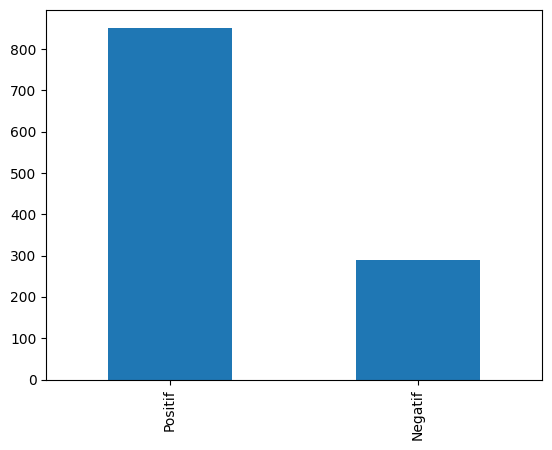

In [11]:
# check the balance of sentiment (label) feature:
df['Sentimen'].value_counts().plot(kind='bar')

# Cleansing Data

In [12]:
import re
import string

def cleansing_text(text):

  # menghilangkan url
  text = re.sub(r'https?:\/\/.*', '', text)

  # menghilangkan mention
  text = re.sub(r'RT @[\w]*', '', text)
  text = re.sub(r'@[\w]*', '', text)

  # hapus punctuation
  remove = string.punctuation
  translator = str.maketrans(remove, ' '*len(remove))
  text = text.translate(translator)

  # remove ASCII dan unicode
  text = text.encode('ascii', 'ignore').decode('utf-8')
  text = re.sub(r'[^\x00-\x7f]',r'', text)

  # remove newline
  text = text.replace('\n', ' ')

  # Menghilangkan angka
  text = re.sub(r'\d', '', text)

  # Menghilangkan tanda baca dan simbol
  text = re.sub(r'[^\w]', ' ', text)

  return text

df['Cleansing']= df['Text'].apply(lambda x:cleansing_text(x))
df

<ipython-input-12-1d52ccaaab35>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleansing']= df['Text'].apply(lambda x:cleansing_text(x))


,Text,Sentimen,Label,Cleansing
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global
...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana
1137,@naninands tds sama mecima aja please:( dyandra gak karuan gak ada qn:(,Negatif,0,tds sama mecima aja please dyandra gak karuan gak ada qn
1138,@naninands tertekan banget aku asli liat dyandra… harusnya ngeliat day 1 kemarin tuh mereka aju banding lagi gak sih promotor2 ke SM? maksud aku gak wise banget gitu udah ada insiden kyk gitu (meskipun day 2 sukses ya),Negatif,0,tertekan banget aku asli liat dyandra harusnya ngeliat day kemarin tuh mereka aju banding lagi gak sih promotor ke SM maksud aku gak wise banget gitu udah ada insiden kyk gitu meskipun day sukses ya
1139,Kamu tahu apa yang lebih manis daripada gula? Dyandra dong..! https://t.co/6A7H2vPWAW,Positif,1,Kamu tahu apa yang lebih manis daripada gula Dyandra dong


# Case Folding

In [13]:
def case_folding(text):
  # lowercase
  text = text.lower()
  return text

df['Case Folding']= df['Cleansing'].apply(lambda x:case_folding(x))
df

,Text,Sentimen,Label,Cleansing,Case Folding
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global
...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana
1137,@naninands tds sama mecima aja please:( dyandra gak karuan gak ada qn:(,Negatif,0,tds sama mecima aja please dyandra gak karuan gak ada qn,tds sama mecima aja please dyandra gak karuan gak ada qn
1138,@naninands tertekan banget aku asli liat dyandra… harusnya ngeliat day 1 kemarin tuh mereka aju banding lagi gak sih promotor2 ke SM? maksud aku gak wise banget gitu udah ada insiden kyk gitu (meskipun day 2 sukses ya),Negatif,0,tertekan banget aku asli liat dyandra harusnya ngeliat day kemarin tuh mereka aju banding lagi gak sih promotor ke SM maksud aku gak wise banget gitu udah ada insiden kyk gitu meskipun day sukses ya,tertekan banget aku asli liat dyandra harusnya ngeliat day kemarin tuh mereka aju banding lagi gak sih promotor ke sm maksud aku gak wise banget gitu udah ada insiden kyk gitu meskipun day sukses ya
1139,Kamu tahu apa yang lebih manis daripada gula? Dyandra dong..! https://t.co/6A7H2vPWAW,Positif,1,Kamu tahu apa yang lebih manis daripada gula Dyandra dong,kamu tahu apa yang lebih manis daripada gula dyandra dong


# Tokenize

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.tokenize import word_tokenize
def tokenization(text):
  text = word_tokenize(text)
  return text

df['Tokenize'] = df['Case Folding'].apply(lambda x: tokenization(x))
df

,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]"
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]"
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]"
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]"
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]"
...,...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana,"[kalo, dream, sama, yang, bawa, dyandra, dan, di, ice, kemungkinan, harganya, bisa, sama, atau, beda, dikit, sama, the, link, tiket, tertingginya, juta, tapi, tergantung, sponsor, dream, gimana]"
1137,@naninands tds sama mecima aja please:( dyandra gak karuan gak ada qn:(,Negatif,0,tds sama mecima aja please dyandra gak karuan gak ada qn,tds sama mecima aja please dyandra gak karuan gak ada qn,"[tds, sama, mecima, aja, please, dyandra, gak, karuan, gak, ada, qn]"
1138,@naninands tertekan banget aku asli liat dyandra… harusnya ngeliat day 1 kemarin tuh mereka aju banding lagi gak sih promotor2 ke SM? maksud aku gak wise banget gitu udah ada insiden kyk gitu (meskipun day 2 sukses ya),Negatif,0,tertekan banget aku asli liat dyandra harusnya ngeliat day kemarin tuh mereka aju banding lagi gak sih promotor ke SM maksud aku gak wise banget gitu udah ada insiden kyk gitu meskipun day sukses ya,tertekan banget aku asli liat dyandra harusnya ngeliat day kemarin tuh mereka aju banding lagi gak sih promotor ke sm maksud aku gak wise banget gitu udah ada insiden kyk gitu meskipun day sukses ya,"[tertekan, banget, aku, asli, liat, dyandra, harusnya, ngeliat, day, kemarin, tuh, mereka, aju, banding, lagi, gak, sih, promotor, ke, sm, maksud, aku, gak, wise, banget, gitu, udah, ada, ins

# Stopwords Removal

In [16]:
# import stopword
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_indonesia = stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword_indonesia]
  return text

df['Stopword Removal'] = df['Tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]"
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gini, ya, pelayanannya]"
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayaknya, sediain, coba, liat, reelsnya, dyandra, global, deh]"
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, situ]"
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]","[pemeriksaan, area, bag, check, ya, kak, denahnya, official, ig, dyandra, global]"
...,...,...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana,"[kalo, dream, sama, yang, bawa, dyandra, dan, di, ice, kemungkinan, harganya, bisa, sama, atau, beda, dikit, sama, the, link, tiket, tertingginya, juta, tapi, tergantung, sponsor, dream, gimana]","[kalo, dream, bawa, dyandra, ice, harganya, beda, dikit, the, link, tiket, tertingginya, juta, tergantung, sponsor, dream, gimana]"
1137,@naninands tds sama mecima aja please:( dyandra gak karuan gak ada qn:(,Negatif,0,tds sama mecima aja please dyandra gak karuan gak ada qn,tds sama mecima aja please dyandra gak karuan gak ada qn,"[tds, sama, mecima, aja, please, dyandra, gak, karuan, gak, ada, qn]","[tds, mecima, aja, please, dyandra, gak, karuan, gak, qn]"
1138,@naninands tertekan banget aku asli liat dyandra… harusnya ngeliat day 1 kemarin tuh mereka aju banding lagi gak sih promotor2 ke SM? maksud aku gak wise banget gitu udah ada insid

# Stemming

In [17]:
# import Sastrawi Stemmer
! pip install Sastrawi
# from nltk.stem import PorterStemmer
# st = PorterStemmer()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = [stemmer.stem(remove_stopwords) for remove_stopwords in text]
  return text

df['Stemming'] = df['Stopword Removal'].apply(lambda x: stemming(x))
df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal,Stemming
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]"
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gin, ya, layan]"
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayaknya, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayak, ain, coba, liat, reelsnya, dyandra, global, deh]"
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasa, pengin, foto, situ]"
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]","[pemeriksaan, area, bag, check, ya, kak, denahnya, official, ig, dyandra, global]","[periksa, area, bag, check, ya, kak, denah, official, ig, dyandra, global]"
...,...,...,...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana,"[kalo, dream, sama, yang, bawa, dyandra, dan, di, ice, kemungkinan, harganya, bisa, sama, atau, beda, dikit, sama, the, link, tiket, tertingginya, juta, tapi, tergantung, sponsor, dream, gimana]","[kalo, dream, bawa, dyandra, ice, harganya, beda, dikit, the, link, tiket, tertingginya, juta, tergantung, sponsor, dream, gimana]","[kalo, dream, bawa, dyandra, ice, harga, beda, dikit, the, link, tiket, tinggi, juta, gantung, sponsor,

In [18]:
def fit_stopwords(text):
  text = np.array(text)
  text = ' '.join(text)
  return text

df['After Preprocessing'] = df['Stemming'].apply(lambda x: fit_stopwords(x))
df

,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal,Stemming,After Preprocessing
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]",anjir dyandra global gak tanggung banget gedeg banget promotor
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gin, ya, layan]",dyandra global mantep gin ya layan
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayaknya, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayak, ain, coba, liat, reelsnya, dyandra, global, deh]",dyandra global kayak ain coba liat reelsnya dyandra global deh
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasa, pengin, foto, situ]",dyandra global udah bagus nih btw gak nonton numpang foto gak sih lucu banget ls raksasa pengin foto situ
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]","[pemeriksaan, area, bag, check, ya, kak, denahnya, official, ig, dyandra, global]","[periksa, area, bag, check, ya, kak, denah, official, ig, dyandra, global]",periksa area bag check ya kak denah official ig dyandra global
...,...,...,...,...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana,"[kalo, dream, sama, yang, bawa, dyandra, dan, di, ice, kemungkinan, harganya, b

In [19]:
# menghilangkan duplikat
df.drop_duplicates(subset = "After Preprocessing", keep = 'first', inplace = True)
df

,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal,Stemming,After Preprocessing
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]",anjir dyandra global gak tanggung banget gedeg banget promotor
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gin, ya, layan]",dyandra global mantep gin ya layan
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayaknya, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayak, ain, coba, liat, reelsnya, dyandra, global, deh]",dyandra global kayak ain coba liat reelsnya dyandra global deh
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasa, pengin, foto, situ]",dyandra global udah bagus nih btw gak nonton numpang foto gak sih lucu banget ls raksasa pengin foto situ
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]","[pemeriksaan, area, bag, check, ya, kak, denahnya, official, ig, dyandra, global]","[periksa, area, bag, check, ya, kak, denah, official, ig, dyandra, global]",periksa area bag check ya kak denah official ig dyandra global
...,...,...,...,...,...,...,...,...,...
1136,"@wtrmleonnie @junmyeonjhjs Kalo dream sama yang bawa dyandra dan di ice. Kemungkinan harganya bisa sama atau beda dikit sama the link, tiket tertingginya 3 juta. Tapi tergantung sponsor dream gimana.",Positif,1,Kalo dream sama yang bawa dyandra dan di ice Kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta Tapi tergantung sponsor dream gimana,kalo dream sama yang bawa dyandra dan di ice kemungkinan harganya bisa sama atau beda dikit sama the link tiket tertingginya juta tapi tergantung sponsor dream gimana,"[kalo, dream, sama, yang, bawa, dyandra, dan, di, ice, kemungkinan, harganya, b

In [20]:
df.head(50)

,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal,Stemming,After Preprocessing
0,"Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j",Negatif,0,Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,keluar anjir pihak dyandra global gak ada tanggung jawabnya banget gedeg banget sama ini promotor,"[keluar, anjir, pihak, dyandra, global, gak, ada, tanggung, jawabnya, banget, gedeg, banget, sama, ini, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]","[anjir, dyandra, global, gak, tanggung, banget, gedeg, banget, promotor]",anjir dyandra global gak tanggung banget gedeg banget promotor
1,@SMTOWN_JKT Dyandra global mantep Gini ya pelayanannya,Positif,1,Dyandra global mantep Gini ya pelayanannya,dyandra global mantep gini ya pelayanannya,"[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gini, ya, pelayanannya]","[dyandra, global, mantep, gin, ya, layan]",dyandra global mantep gin ya layan
2,"RT @RolandaHapsari4: @nct_menfess Dyandra global kayaknya yang sediain, coba liat reelsnya Dyandra global deh https://t.co/FiQj4VJ5jG",Positif,1,Dyandra global kayaknya yang sediain coba liat reelsnya Dyandra global deh,dyandra global kayaknya yang sediain coba liat reelsnya dyandra global deh,"[dyandra, global, kayaknya, yang, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayaknya, sediain, coba, liat, reelsnya, dyandra, global, deh]","[dyandra, global, kayak, ain, coba, liat, reelsnya, dyandra, global, deh]",dyandra global kayak ain coba liat reelsnya dyandra global deh
3,"Dyandra Global udah bagus nih,, btw, yang gak nonton bisa numpang foto gak sih?? lucu banget LS raksasanya, pengin foto di situ,, https://t.co/P2tomwrXBK",Positif,1,Dyandra Global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget LS raksasanya pengin foto di situ,dyandra global udah bagus nih btw yang gak nonton bisa numpang foto gak sih lucu banget ls raksasanya pengin foto di situ,"[dyandra, global, udah, bagus, nih, btw, yang, gak, nonton, bisa, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, di, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasanya, pengin, foto, situ]","[dyandra, global, udah, bagus, nih, btw, gak, nonton, numpang, foto, gak, sih, lucu, banget, ls, raksasa, pengin, foto, situ]",dyandra global udah bagus nih btw gak nonton numpang foto gak sih lucu banget ls raksasa pengin foto situ
4,"@johnnysuhcrush Untuk pemeriksaan bakal ada di area bag check ya kak, bisa dilihat denahnya di official IG dyandra global ^^",Positif,1,Untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official IG dyandra global,untuk pemeriksaan bakal ada di area bag check ya kak bisa dilihat denahnya di official ig dyandra global,"[untuk, pemeriksaan, bakal, ada, di, area, bag, check, ya, kak, bisa, dilihat, denahnya, di, official, ig, dyandra, global]","[pemeriksaan, area, bag, check, ya, kak, denahnya, official, ig, dyandra, global]","[periksa, area, bag, check, ya, kak, denah, official, ig, dyandra, global]",periksa area bag check ya kak denah official ig dyandra global
5,"Dyandra Global Edutainment juga mengatakan bahwa saat itu situasi di lokasi sudah aman terkendali, bahkan, tidak ditemukan adanya hal-hal yang mencurigakan. #kumparanKPOP https://t.co/C6XJsZVz6R",Positif,1,Dyandra Global Edutainment juga mengatakan bahwa saat itu situasi di lokasi sudah aman terkendali bahkan tidak ditemukan adanya hal hal yang mencurigakan kumparanKPOP,dyandra global edutainment juga mengatakan bahwa saat itu situasi di lokasi sudah aman terkendali bahkan tidak ditemukan adanya hal hal yang mencurigakan kumparankpop,"[dyandra, global, edutainment, juga, mengatakan, bahwa, saat, itu, situasi, di, lokasi, sudah, aman, terkendali, bahkan, tidak,

In [21]:
df.tail(50)

,Text,Sentimen,Label,Cleansing,Case Folding,Tokenize,Stopword Removal,Stemming,After Preprocessing
1090,@jcmoonsky bisa jadi bener sih rumor ordal dyandra dari awal the link selalu bener ???,Negatif,0,bisa jadi bener sih rumor ordal dyandra dari awal the link selalu bener,bisa jadi bener sih rumor ordal dyandra dari awal the link selalu bener,"[bisa, jadi, bener, sih, rumor, ordal, dyandra, dari, awal, the, link, selalu, bener]","[bener, sih, rumor, ordal, dyandra, the, link, bener]","[bener, sih, rumor, ordal, dyandra, the, link, bener]",bener sih rumor ordal dyandra the link bener
1091,"kalo yang bawanya dyandra, bau bau bakal di ice lagi sih",Negatif,0,kalo yang bawanya dyandra bau bau bakal di ice lagi sih,kalo yang bawanya dyandra bau bau bakal di ice lagi sih,"[kalo, yang, bawanya, dyandra, bau, bau, bakal, di, ice, lagi, sih]","[kalo, bawanya, dyandra, bau, bau, ice, sih]","[kalo, bawa, dyandra, bau, bau, ice, sih]",kalo bawa dyandra bau bau ice sih
1092,wih beneran di bawa dyandra nih?,Positif,1,wih beneran di bawa dyandra nih,wih beneran di bawa dyandra nih,"[wih, beneran, di, bawa, dyandra, nih]","[wih, beneran, bawa, dyandra, nih]","[wih, beneran, bawa, dyandra, nih]",wih beneran bawa dyandra nih
1093,tds2 fix dyandra gue cuma bisa berdoa semoga tangan wangi kayak war tiket the link kemarin?,Positif,1,tds fix dyandra gue cuma bisa berdoa semoga tangan wangi kayak war tiket the link kemarin,tds fix dyandra gue cuma bisa berdoa semoga tangan wangi kayak war tiket the link kemarin,"[tds, fix, dyandra, gue, cuma, bisa, berdoa, semoga, tangan, wangi, kayak, war, tiket, the, link, kemarin]","[tds, fix, dyandra, gue, berdoa, semoga, tangan, wangi, kayak, war, tiket, the, link, kemarin]","[tds, fix, dyandra, gue, doa, moga, tangan, wangi, kayak, war, tiket, the, link, kemarin]",tds fix dyandra gue doa moga tangan wangi kayak war tiket the link kemarin
1094,Sorry to say tapi apa info beginian dari orang-orang dyandra kayaknya gampang banget ya bocornya ? https://t.co/4oKhkYGZ4d,Negatif,0,Sorry to say tapi apa info beginian dari orang orang dyandra kayaknya gampang banget ya bocornya,sorry to say tapi apa info beginian dari orang orang dyandra kayaknya gampang banget ya bocornya,"[sorry, to, say, tapi, apa, info, beginian, dari, orang, orang, dyandra, kayaknya, gampang, banget, ya, bocornya]","[sorry, to, say, info, orang, orang, dyandra, kayaknya, gampang, banget, ya, bocornya]","[sorry, to, say, info, orang, orang, dyandra, kayak, gampang, banget, ya, bocor]",sorry to say info orang orang dyandra kayak gampang banget ya bocor
1095,Tds please jangan pake dyandra. Yang lain aja yang udah jelas bagus yang review² nya juga kemaren pada bagus konsernya ?,Negatif,0,Tds please jangan pake dyandra Yang lain aja yang udah jelas bagus yang review nya juga kemaren pada bagus konsernya,tds please jangan pake dyandra yang lain aja yang udah jelas bagus yang review nya juga kemaren pada bagus konsernya,"[tds, please, jangan, pake, dyandra, yang, lain, aja, yang, udah, jelas, bagus, yang, review, nya, juga, kemaren, pada, bagus, konsernya]","[tds, please, pake, dyandra, aja, udah, bagus, review, nya, kemaren, bagus, konsernya]","[tds, please, pake, dyandra, aja, udah, bagus, review, nya, kemaren, bagus, konser]",tds please pake dyandra aja udah bagus review nya kemaren bagus konser
1096,Dengan segala harap dyandra please ada QN dong https://t.co/dupxYQjY4b,Negatif,0,Dengan segala harap dyandra please ada QN dong,dengan segala harap dyandra please ada qn dong,"[dengan, segala, harap, dyandra, please, ada, qn, dong]","[harap, dyandra, please, qn]","[harap, dyandra, please, qn]",harap dyandra please qn
1097,SM kalau tetep mau sama dyandra dan tetep di ICE menurut gue konyol banget https://t.co/MopnCoNfyk,Negatif,0,SM kalau tetep mau sama dyandra dan tetep di ICE menurut gue konyol banget,sm kalau tetep mau sama dyandra dan tetep di ice menurut gue konyol banget,"[sm, kalau, tetep, mau, sama, dyandra, dan, tetep, di, ice, menurut, gue, konyol

# Cek Jumlah Positif dan Negatif

In [22]:
df["Sentimen"].value_counts()

Positif    845
Negatif    285
Name: Sentimen, dtype: int64

In [24]:
s_positif = df[df['Sentimen']=='Positif'].sample(285,replace=True)
s_negatif = df[df['Sentimen']=='Negatif'].sample(285,replace=True)
df = pd.concat([s_positif, s_negatif])

print(df.shape)
print(df['Sentimen'].value_counts(normalize=True))

(570, 9)
Positif    0.5
Negatif    0.5
Name: Sentimen, dtype: float64


# Term Frequency

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(df['Cleansing'])
tf_vectorizer = tf.toarray()
tf_vectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# dapatkan semua kata unik dalam korpus
vocabulary = vectorizer.get_feature_names_out()

# menampilkan vektor fitur dokumen
pd.DataFrame(tf_vectorizer, columns=vocabulary)

,abadikan,abis,about,acak,acara,acaranya,acungin,ada,adain,adalah,...,yah,yakali,yakin,yang,yes,you,your,yuk,yuklah,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
566,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
567,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


# Membagi Data Training dan Data Testing (80:20)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_vectorizer, df['Label'], test_size=0.2, random_state=0)
# model_g.fit(X_train,y_train)

In [29]:
print("Jumlah Data Uji : ",X_train.shape)
print("Jumlah Data Latih : ",X_test.shape)

Jumlah Data Uji :  (456, 1458)
Jumlah Data Latih :  (114, 1458)


# Penerapan Model Naive Bayes

In [30]:
# import library confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# model select
from sklearn import naive_bayes
from sklearn import metrics

In [31]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model_g = MultinomialNB()

multinomial = naive_bayes.MultinomialNB()
multinomial.fit(X_train, y_train)
Y_Preddict_Test = multinomial.predict(X_test)
Y_Preddict_Train = multinomial.predict(X_train)

# Menampilkan Akurasi, Prediksi, dan Recall

In [32]:
# Akurasi Data Training
print("Akurasi Data Training dengan Naive Bayes: ")
print(accuracy_score(y_train, Y_Preddict_Train))

# Presisi Data Training
print("Presisi Data Training dengan Naive Bayes: ")
print(precision_score(y_train, Y_Preddict_Train))

# Recall Data Training
print("Recall Data Training dengan Naive Bayes: ")
print(recall_score(y_train, Y_Preddict_Train))

Akurasi Data Training dengan Naive Bayes: 
0.9780701754385965
Presisi Data Training dengan Naive Bayes: 
0.9867256637168141
Recall Data Training dengan Naive Bayes: 
0.9695652173913043


In [33]:
# Akurasi Data Testing
print("Akurasi Data Testing dengan Naive Bayes: ")
print(accuracy_score(y_test, Y_Preddict_Test))

# Presisi Data Testing
print("Presisi Data Testing dengan Naive Bayes: ")
print(precision_score(y_test, Y_Preddict_Test))

# Recall Data Testing
print("Recall Data Testing dengan Naive Bayes: ")
print(recall_score(y_test, Y_Preddict_Test))

Akurasi Data Testing dengan Naive Bayes: 
0.9298245614035088
Presisi Data Testing dengan Naive Bayes: 
0.9122807017543859
Recall Data Testing dengan Naive Bayes: 
0.9454545454545454


# Hasil Precision, Recall, and Accuracy Data Training dan Data Testing

In [34]:
# Hasil Data Training
from sklearn.metrics import classification_report
print('-------------------- Hasil Data Training --------------------')
print(' ')
print(classification_report(y_train, Y_Preddict_Train))

-------------------- Hasil Data Training --------------------
 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       226
           1       0.99      0.97      0.98       230

    accuracy                           0.98       456
   macro avg       0.98      0.98      0.98       456
weighted avg       0.98      0.98      0.98       456



In [35]:
# Hasil Data Testing
from sklearn.metrics import classification_report
print('-------------------- Hasil Data Testing --------------------')
print(' ')
print(classification_report(y_test, Y_Preddict_Test))

-------------------- Hasil Data Testing --------------------
 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.91      0.95      0.93        55

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Evaluasi

Memprediksi Dokumen

In [36]:
# expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
# using only Text and Label column
df = df[['After Preprocessing','Label']]
df.head()

<ipython-input-36-372b7a267f6f>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,After Preprocessing,Label
114,user guard staf sana beneran ramah informatif bantu banget nanya nanya dijelasin detail ditawarin air pas konser jalan tim dyandra keren,1
624,asli kali dyandra bagus banget beda parah exo greatt ubah moga depan tetep ya dyandra kalo request bawa dream wayv kalo ot,1
914,dyandra bilang nya usaha pake qn pas kemaren udah qn dyandra bom siap,1
270,also suka ngajak canda ketawa bareng even we re jamming together to mas jalan mantau gapapa shootout to dyandra and team,1
307,big respect banget dyandra salah,1


In [37]:
from textblob import TextBlob
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [38]:
df['Polarity'] = df['After Preprocessing'].apply(polarity)

In [39]:
df.head(10)

,After Preprocessing,Label,Polarity
114,user guard staf sana beneran ramah informatif bantu banget nanya nanya dijelasin detail ditawarin air pas konser jalan tim dyandra keren,1,0.0
624,asli kali dyandra bagus banget beda parah exo greatt ubah moga depan tetep ya dyandra kalo request bawa dream wayv kalo ot,1,0.0
914,dyandra bilang nya usaha pake qn pas kemaren udah qn dyandra bom siap,1,0.0
270,also suka ngajak canda ketawa bareng even we re jamming together to mas jalan mantau gapapa shootout to dyandra and team,1,0.0
307,big respect banget dyandra salah,1,0.0
552,bener tribune dyandra kemaren kokoh,1,0.0
448,jujur iya happy gitu dyandra beda jalur si kuning alhamdulillah,1,0.8
654,dyandra masuk bagus pegang event kayak pamer furniture dll harap baik sistem tiketing qn aja sih kayak aman bagus banget,1,0.0
1076,moga next konser pake apple wood dyandra deh mecima,1,0.0
345,tetep ga qn gue praise dyandra keren banget segi service please staf nya ramah banget nawarin minum mulu,1,0.0


In [40]:
df.tail(10)

,After Preprocessing,Label,Polarity
981,kalo beneran dyandra moga pertimbangin venue kemaren dipake skz kayak kapasitas,0,0.0
224,situ posisi udah lagu kayak udah jalan ya tangkap mata gue staf dyandra calo maybe kerjasama dunia ticketing orang staf tahu,0,0.0
785,gapapa kalo dyandra kalo qn booth makan please,0,0.0
1051,duh ga bayang pas ep kayak gimana ya harap venue nya gede dyandra ice mulu,0,-0.3
599,hooh mecima emang drama kemaren dyandra aja sih kecuali tiket udah scan duluan dateng,0,0.0
772,ga orang pengin prefer venue nya ga gede gbk kalo dyandra emang udah kerjasama ice situ ujung protes kayak,0,0.0
437,banding qn sebenernya kecewa gak booth merchandise sih ya udah cuman harap banget dyandra depan perhatiin md membludak banget jujur kemarin cari meumwonbong sampe kena scam,0,0.0
1109,kalo tds promotor dyandra kayak mending ga nonton deh sakit hati bodo kalo bilang lebay,0,0.0
733,hmm konteks bahas kompensasi gaada bilang ga hak kecewa kayak sayang konser stop ga sepakat kalo dyandra salah antisipasi etc,0,0.0
849,dyandra promotor kemaren gue salah korban ganas,0,0.0


In [41]:
def sentiment(label):
  if label<0.0:
    return "Negatif"
  else:
    return "Positif"

In [42]:
df['Prediksi Sentimen'] = df['Polarity'].apply(sentiment)

In [43]:
df.head(10)

,After Preprocessing,Label,Polarity,Prediksi Sentimen
114,user guard staf sana beneran ramah informatif bantu banget nanya nanya dijelasin detail ditawarin air pas konser jalan tim dyandra keren,1,0.0,Positif
624,asli kali dyandra bagus banget beda parah exo greatt ubah moga depan tetep ya dyandra kalo request bawa dream wayv kalo ot,1,0.0,Positif
914,dyandra bilang nya usaha pake qn pas kemaren udah qn dyandra bom siap,1,0.0,Positif
270,also suka ngajak canda ketawa bareng even we re jamming together to mas jalan mantau gapapa shootout to dyandra and team,1,0.0,Positif
307,big respect banget dyandra salah,1,0.0,Positif
552,bener tribune dyandra kemaren kokoh,1,0.0,Positif
448,jujur iya happy gitu dyandra beda jalur si kuning alhamdulillah,1,0.8,Positif
654,dyandra masuk bagus pegang event kayak pamer furniture dll harap baik sistem tiketing qn aja sih kayak aman bagus banget,1,0.0,Positif
1076,moga next konser pake apple wood dyandra deh mecima,1,0.0,Positif
345,tetep ga qn gue praise dyandra keren banget segi service please staf nya ramah banget nawarin minum mulu,1,0.0,Positif


In [44]:
df.tail(10)

,After Preprocessing,Label,Polarity,Prediksi Sentimen
981,kalo beneran dyandra moga pertimbangin venue kemaren dipake skz kayak kapasitas,0,0.0,Positif
224,situ posisi udah lagu kayak udah jalan ya tangkap mata gue staf dyandra calo maybe kerjasama dunia ticketing orang staf tahu,0,0.0,Positif
785,gapapa kalo dyandra kalo qn booth makan please,0,0.0,Positif
1051,duh ga bayang pas ep kayak gimana ya harap venue nya gede dyandra ice mulu,0,-0.3,Negatif
599,hooh mecima emang drama kemaren dyandra aja sih kecuali tiket udah scan duluan dateng,0,0.0,Positif
772,ga orang pengin prefer venue nya ga gede gbk kalo dyandra emang udah kerjasama ice situ ujung protes kayak,0,0.0,Positif
437,banding qn sebenernya kecewa gak booth merchandise sih ya udah cuman harap banget dyandra depan perhatiin md membludak banget jujur kemarin cari meumwonbong sampe kena scam,0,0.0,Positif
1109,kalo tds promotor dyandra kayak mending ga nonton deh sakit hati bodo kalo bilang lebay,0,0.0,Positif
733,hmm konteks bahas kompensasi gaada bilang ga hak kecewa kayak sayang konser stop ga sepakat kalo dyandra salah antisipasi etc,0,0.0,Positif
849,dyandra promotor kemaren gue salah korban ganas,0,0.0,Positif


Confusion Matrix

In [45]:
# Confusion Matrix Data Training
from sklearn.metrics import confusion_matrix
training_mat = confusion_matrix(y_train, Y_Preddict_Train)
training_mat

array([[223,   3],
       [  7, 223]])

In [46]:
# Confusion Matrix Data Testing
from sklearn.metrics import confusion_matrix
testing_mat = confusion_matrix(y_test, Y_Preddict_Test)
testing_mat

array([[54,  5],
       [ 3, 52]])

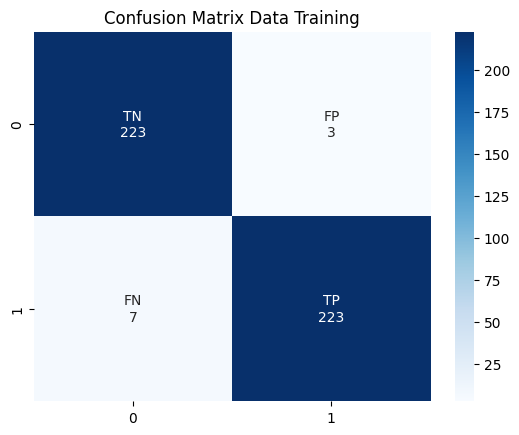

In [47]:
plt.title('Confusion Matrix Data Training')
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in training_mat.flatten()]
labels = [f"{Text}\n{Sentimen}" for Text, Sentimen in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(training_mat, annot=labels, fmt='', cmap='Blues');

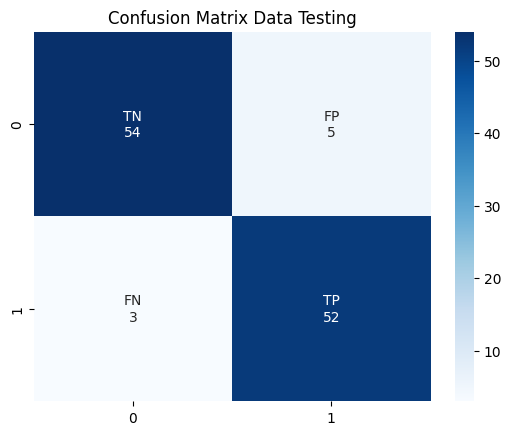

In [48]:
plt.title('Confusion Matrix Data Testing')
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in testing_mat.flatten()]
labels = [f"{Text}\n{Sentimen}" for Text, Sentimen in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(testing_mat, annot=labels, fmt='', cmap='Blues');

# Testing Prototype

In [49]:
tweet = 'Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget, gedeg banget sama ini promotor https://t.co/d3bVnzIT7j	'

In [50]:
testing_1 = cleansing_text(tweet)
print("Pre-Processing Pertama: ")
print(testing_1)

Pre-Processing Pertama: 
Keluar anjir pihak dyandra global gak ada tanggung jawabnya banget  gedeg banget sama ini promotor 


In [51]:
testing_2 = tokenization(testing_1)
print("Pre-Processing Kedua: ")
print(testing_2)

Pre-Processing Kedua: 
['Keluar', 'anjir', 'pihak', 'dyandra', 'global', 'gak', 'ada', 'tanggung', 'jawabnya', 'banget', 'gedeg', 'banget', 'sama', 'ini', 'promotor']


In [52]:
testing_3 = remove_stopwords(testing_2)
print("Pre-Processing Ketiga: ")
print(testing_3)

Pre-Processing Ketiga: 
['Keluar', 'anjir', 'dyandra', 'global', 'gak', 'tanggung', 'banget', 'gedeg', 'banget', 'promotor']


In [53]:
testing_4 = stemming(testing_3)
print("Pre-Processing Keempat: ")
print(testing_4)

Pre-Processing Keempat: 
['keluar', 'anjir', 'dyandra', 'global', 'gak', 'tanggung', 'banget', 'gedeg', 'banget', 'promotor']


In [54]:
def fit_stopwords(text):
  text = np.array(text)
  text = ' '.join(text)
  return text

In [55]:
hasil_prepro = fit_stopwords(testing_4)
print('Hasil Preprocessing: ')
print(hasil_prepro)

Hasil Preprocessing: 
keluar anjir dyandra global gak tanggung banget gedeg banget promotor


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Positif", "Negatif"])

review_vector = vectorizer.transform([tweet]).toarray() # vectorizing
pred_text = multinomial.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print("Teks tweet tersebut termasuk kedalam sentimen: ", pred_text)

Teks tweet tersebut termasuk kedalam sentimen:  ['Negatif']
